# Samuels Viewer

Interface to functionality for viewing and comparing corpora processed with the Samuels Processor

In [1]:
import SamuelsCorpus as Sam
%matplotlib inline

Set up some filenames - these should be the base names (Samuels Viewer will add the _combined.csv and _cooccurrence.json endings for the individual files.  Only set the parentdir if these files are not stored in the current directory.)

In [5]:
#parentdir="/Users/juliewe/Dropbox/oldbailey/speech_corpora/theft/all/samuels_tagged"
filenames={'fnonl':'f_nonl','mnonl':'m_nonl'}
           

Load up files into a Samuels Viewer

In [6]:
mnonl=Sam.Viewer(filenames['mnonl'],colors=['b'])

Error reading data file m_nonl_combined.csv


Now we can play with the bag-of-words functionality in the SamuelsViewer

In [4]:
mnonl_tagbag=mnonl.make_bow(field='SEMTAG3',cutoff=20,displaygraph=True)

AttributeError: 'Viewer' object has no attribute 'rows'

There are functions to find tags for words and words for tags e.g.,

In [5]:
print(mnonl.find_tags('woman',field='SEMTAG3'))
print(mnonl.find_tags('women'))

[('AD.03.b [Woman]', 673), ('AY.06.b [The common people]', 12), ('AY.01.g.01 [Married woman]', 4), ('BB.09.b.01 [Servant]', 3)]
[('AD.03.b [Woman]', 77), ('AY.06.b [The common people]', 3), ('BB.09.b.01 [Servant]', 1), ('AY.01.g.01 [Married woman]', 1)]


In [6]:
print(mnonl.find_tags('man'))
print(mnonl.find_tags('men'))

[('AD.03.a [Man]', 2884), ('AD.03.h.01 [Old man]', 9), ('ZA01 [Personal Name]', 2), ('AB.17.e.04.e [Digit - finger, toe]', 2)]
[('AD.03.a [Man]', 521)]


In [7]:
print(mnonl.find_tags('child'))
print(mnonl.find_tags('children'))

[('AD.03.d [Child]', 160), ('AY.01.e.02 [Child]', 9), ('AR.46.c [Suggestion, proposal]', 2), ('ZA01 [Personal Name]', 1), ('AK.03.b [Source/origin]', 1)]
[('AD.03.d [Child]', 89), ('AY.01.e.02 [Child]', 5)]


In [8]:
print(mnonl.find_text('AD.03.b'))

[('woman', 673), ('women', 77), ('wife', 11), ('sister', 4), ('piece', 3), ('petticoat', 2), ('pieces', 1), ('petticoats', 1), ('mare', 1), ('ladies', 1)]


In [9]:
print(mnonl.find_text('AD.03.a'))

[('man', 2884), ('men', 521), ('gentleman', 23), ('piece', 17), ('horse', 16), ('boy', 10), ('pieces', 8), ('horses', 7), ('a', 3), ('mans', 2)]


In [10]:
print(mnonl.find_text('AD.03.d'))

[('child', 160), ('children', 89), ('small', 9), ('smaller', 1)]


We can also view the co-occurrence distributions for tags.  

* Note that the number associated with the tag is a weight.  Currently it is set to be normalised localised PPMI.  Localised PPMI multiplies PPMI by probability.  Normalisation means that the vector is a unit vector (this won't change the order of saliency but typically makes all of the numbers smaller since the unit vector has length 1 ... the reason for doing this is that it is then more efficient to compute similarities between vectors).

* The list of words (and associated words) for the conceptual features ARE NOW context-specific i.e., words used to express this conceptual feature in the specific context of the given tag.

vard_lower
a        [212, 2349, 5351, 10763, 16544, 19632, 21328, ...
an        [64973, 315588, 440367, 675656, 865958, 1023526]
the      [6, 10858, 17589, 19797, 19816, 25855, 28139, ...
these                 [3818, 8947, 116214, 374778, 374842]
this     [5762, 16528, 24017, 32230, 32314, 44398, 5535...
Name: fileid, dtype: object
(_det:ZC [Grammatical Item],0.9281662504790895) : [('the', 340), ('a', 229), ('this', 51), ('an', 6), ('these', 5)]
vard_lower
young    [2350, 3819, 5763, 16545, 19817, 24675, 32315,...
Name: fileid, dtype: object
(_amod:AF.05 [Plants defined by age/cycles],0.2309745799292507) : [('young', 58)]
vard_lower
other    [32388, 32440, 255912, 257883, 272793, 273049,...
Name: fileid, dtype: object
(_amod:AP.01.f [Difference],0.17140603808980628) : [('other', 57)]
vard_lower
another    [75416, 32375, 60225, 90576, 115705, 255733, 2...
Name: fileid, dtype: object
(_det:ZZ [Unrecognised],0.12874563480815127) : [('another', 41)]
vard_lower
's                           

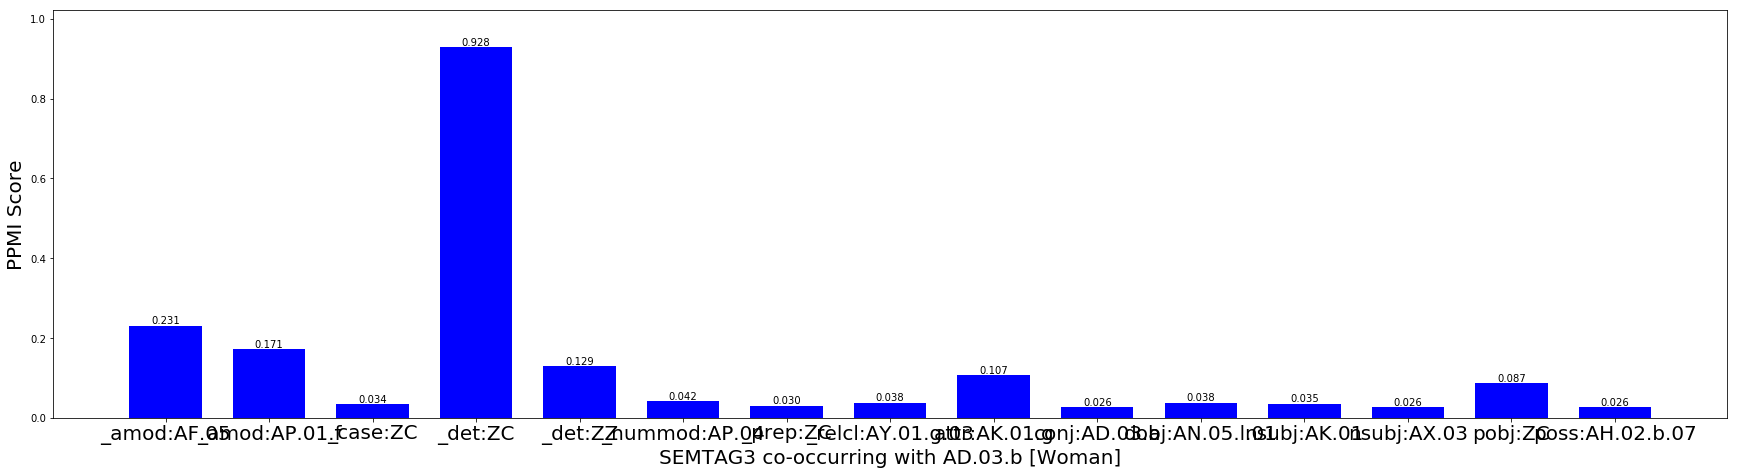

In [11]:
woman=mnonl.get_top_features('AD.03.b',displaygraph=True,cutoff=15)

(_det, 0.9203651401451238)
(_amod, 0.2973927104807386)
(nsubj, 0.16203072207077043)
(_relcl, 0.11509167441101174)
(attr, 0.09795235879648512)
(pobj, 0.08673589795168965)
(dobj, 0.05799222379574188)
(_acl, 0.04354990892729252)
(_nummod, 0.036396711686242214)
(_case, 0.030951843006760276)


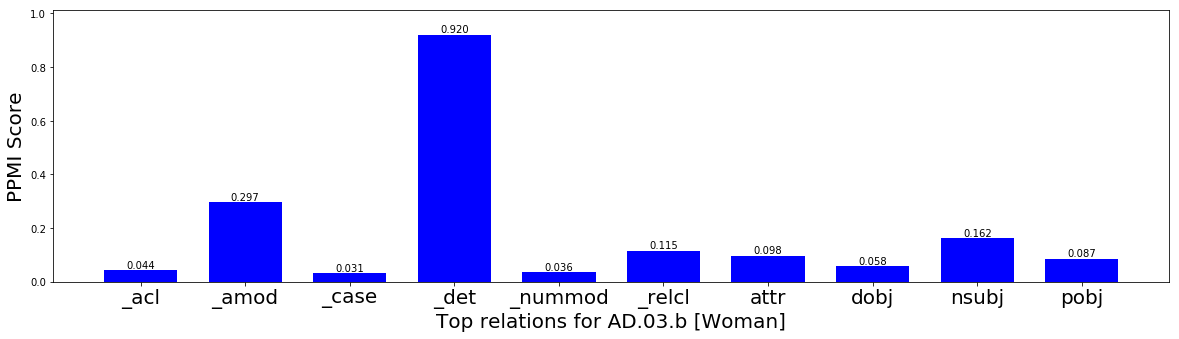

In [35]:
r=mnonl.get_top_relations('AD.03.b',displaygraph=True,cutoff=10)

(_det, 0.8818533822427765)
(_amod, 0.30532335425871787)
(attr, 0.2431648078630329)
(_relcl, 0.18396669039938038)
(nsubj, 0.14176854216186763)
(dobj, 0.07403056330863408)
(_nummod, 0.07332339985939462)
(_acl, 0.06442636740579129)
(pobj, 0.026779218706026807)
(_case, 0.01720247642340742)


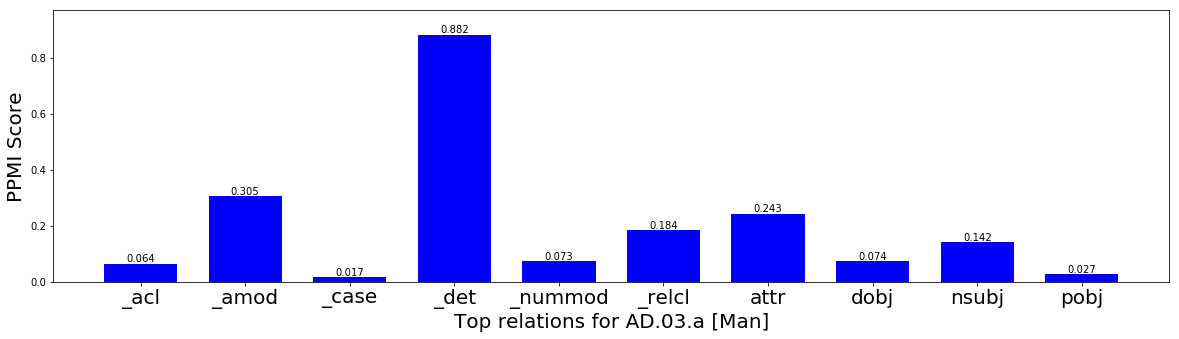

In [36]:
mr=mnonl.get_top_relations('AD.03.a',displaygraph=True,cutoff=10)

(_det, 0.7067210351876916)
(_nummod, 0.42740740409175293)
(_case, 0.3274028447692652)
(conj, 0.2495486191458458)
(_poss, 0.2452309605613258)
(poss, 0.1497389645090203)
(pobj, 0.14243112706534838)
(dobj, 0.138021427898484)
(_amod, 0.12056072508087409)
(_relcl, 0.0730902772281184)
(nsubj, 0.0678074348818081)
(attr, 0.031671446725905036)
(amod, 0.028233542704519974)
(_acl, 0.012556244589903504)
(_predet, 0.005874857457367353)


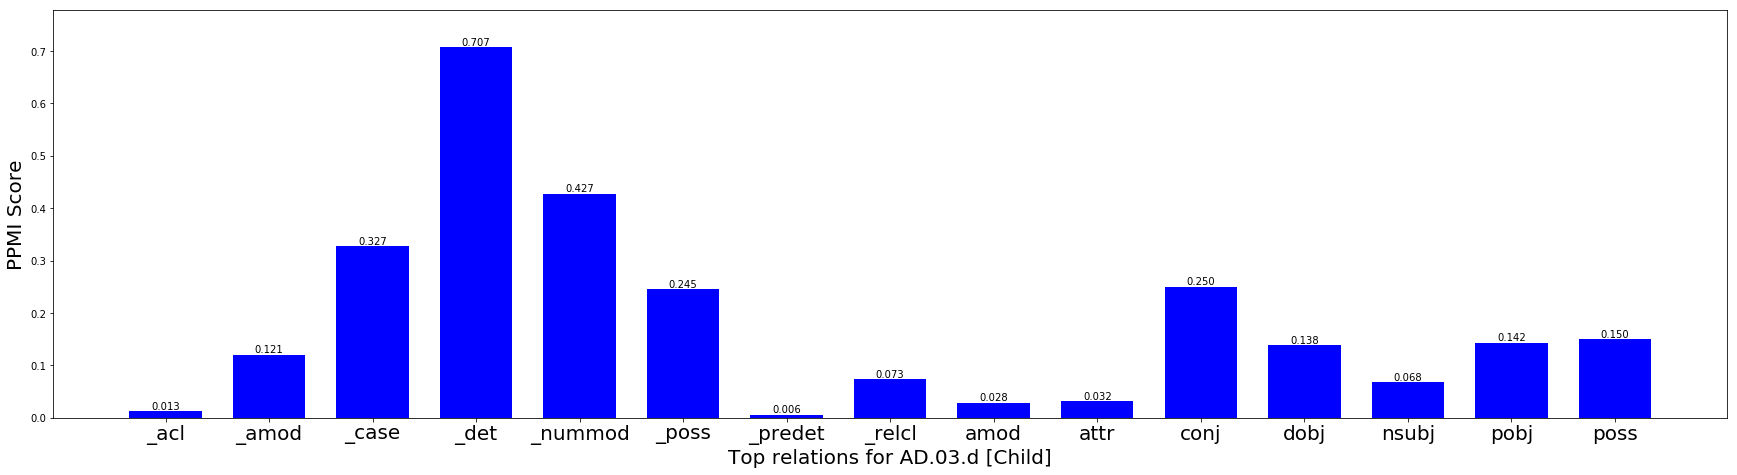

In [14]:
cr=mnonl.get_top_relations('AD.03.d',displaygraph=True,cutoff=15)

vard_lower
young    [2350, 3819, 5763, 16545, 19817, 24675, 32315,...
Name: fileid, dtype: object
(AF.05 [Plants defined by age/cycles],0.8819557730260679) : [('young', 58)]
vard_lower
other    [32388, 32440, 255912, 257883, 272793, 273049,...
Name: fileid, dtype: object
(AP.01.f [Difference],0.44416468549368315) : [('other', 57)]
vard_lower
elderly    [315589, 315596, 315700, 315742, 865959]
young                                      [800820]
Name: fileid, dtype: object
(AB.03 [Age],0.10548948308775473) : [('elderly', 5), ('young', 1)]
vard_lower
married    [58137, 317542, 694346, 731131]
Name: fileid, dtype: object
(AP.07.e.05 [Fact/action of being joined/joining],0.07916976051279104) : [('married', 4)]
vard_lower
poor    [115232, 367662, 744709]
Name: fileid, dtype: object
(AW.04 [Poverty],0.037125264302986356) : [('poor', 3)]
vard_lower
bad    [98868, 348336, 744512]
Name: fileid, dtype: object
(AT.06 [Badness/evil],0.02974568233563226) : [('bad', 3)]
vard_lower
scouring    [314374

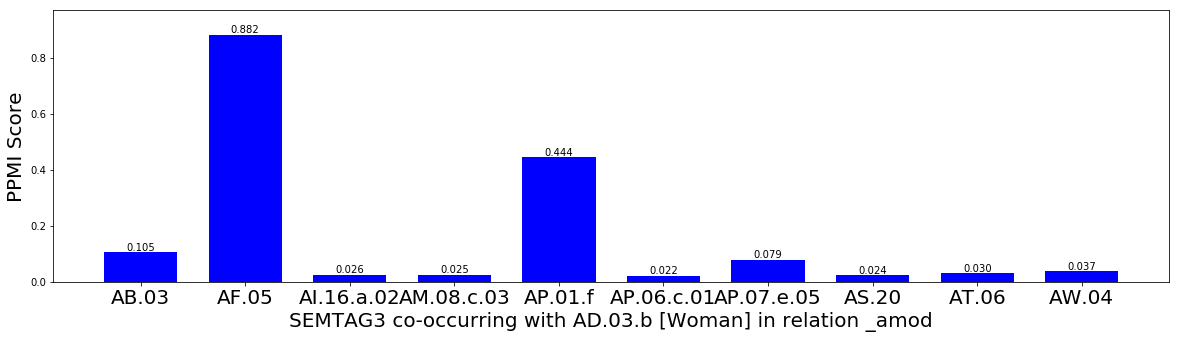

In [15]:
w=mnonl.get_top_features('AD.03.b',rel='_amod',displaygraph=True)

vard_lower
young    [2526, 5670, 14262, 16534, 16616, 23441, 27178...
Name: fileid, dtype: object
(AF.05 [Plants defined by age/cycles],0.9595112729210316) : [('young', 243)]
vard_lower
different                                             [252593]
other        [3924, 3983, 4489, 7454, 13170, 16563, 18394, ...
Name: fileid, dtype: object
(AP.01.f [Difference],0.23392524841151652) : [('other', 167), ('different', 1)]
vard_lower
tall      [51807, 545547, 545848, 545875, 545891, 545916...
taller                                     [331625, 590756]
Name: fileid, dtype: object
(AB.17.c [Bodily height],0.08001286176174242) : [('tall', 17), ('taller', 2)]
vard_lower
labouring    [10059, 13196, 30005, 45858, 91552, 142994, 15...
Name: fileid, dtype: object
(AE.03 [Domestic animal],0.07825346004174877) : [('labouring', 18)]
vard_lower
honest         [23015, 23144, 23385, 55684, 84206, 86035, 888...
respectable            [217481, 267112, 279209, 331041, 1032855]
Name: fileid, dtype: object
(BD.

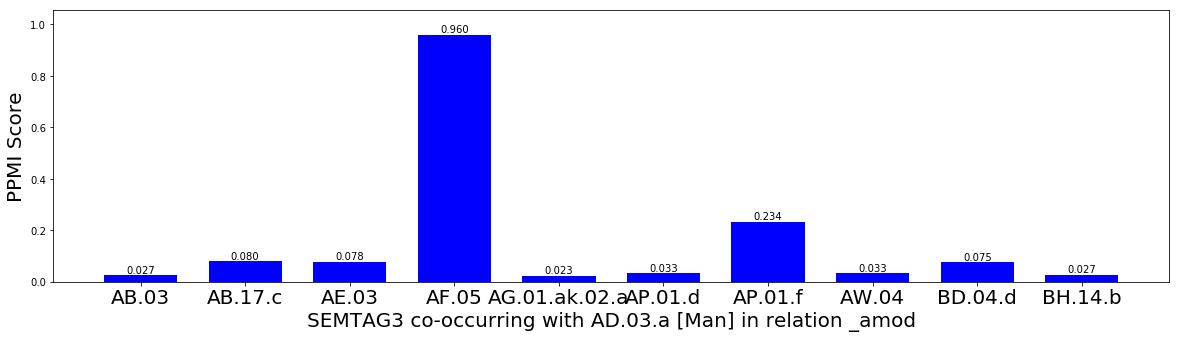

In [16]:
m=mnonl.get_top_features('AD.03.a',rel='_amod',displaygraph=True)

vard_lower
small    [445, 603, 11933, 61078, 65865, 68030, 39095]
Name: fileid, dtype: object
(AD.03.d [Child],0.8953349342521663) : [('small', 7)]
vard_lower
unborn    [23742, 28923, 51099]
Name: fileid, dtype: object
(AK.01 [Existence],0.36777950285447814) : [('unborn', 3)]
vard_lower
grand    [1076852]
Name: fileid, dtype: object
(AS.13.b [High reputation, honour],0.13304903749602) : [('grand', 1)]
vard_lower
little    [212195, 212243, 868997]
Name: fileid, dtype: object
(AS.11.a [Unimportance, triviality],0.11182734144414672) : [('little', 3)]
vard_lower
dear    [39119]
Name: fileid, dtype: object
(AU.27.b [Loved one],0.1105620153066347) : [('dear', 1)]
vard_lower
orphan    [441608]
Name: fileid, dtype: object
(AY.01.e.02 [Child],0.1105620153066347) : [('orphan', 1)]
vard_lower
eldest    [638902]
Name: fileid, dtype: object
(AB.03 [Age],0.06799882120112041) : [('eldest', 1)]
vard_lower
young    [438565, 638894]
Name: fileid, dtype: object
(AF.05 [Plants defined by age/cycles],0.055

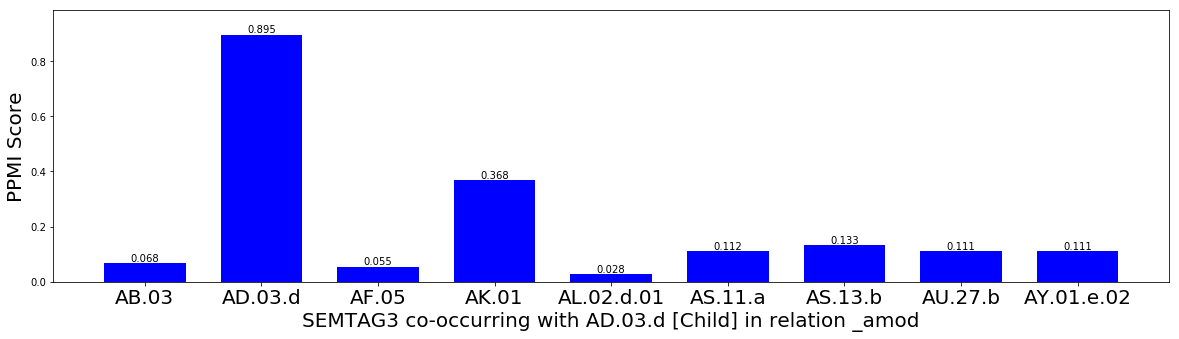

In [17]:
c=mnonl.get_top_features('AD.03.d',rel='_amod',cutoff=10,displaygraph=True)

vard_lower
meet                                              [75115]
met     [24673, 28409, 49969, 90813, 158631, 193118, 2...
Name: fileid, dtype: object
(AN.05.l.01 [Meeting/encounter],0.8192414024662863) : [('met', 13), ('meet', 1)]
vard_lower
saw     [5, 16527, 24016, 32313, 111689, 183972, 21597...
see                                              [263448]
seen                                     [653789, 744707]
Name: fileid, dtype: object
(AI.14.b [Seeing/looking],0.32736072224294593) : [('saw', 17), ('seen', 2), ('see', 1)]
vard_lower
served     [567920, 654999]
serving    [562395, 768323]
Name: fileid, dtype: object
(AG.01.v [Serving food],0.2630711508788512) : [('serving', 2), ('served', 2)]
vard_lower
take               [34470, 301881, 315411, 379046, 423572]
taken                                             [315764]
took     [136539, 400216, 400245, 470275, 476860, 56644...
Name: fileid, dtype: object
(AW.15 [Taking],0.13245992067822063) : [('took', 9), ('take', 5), ('taken'

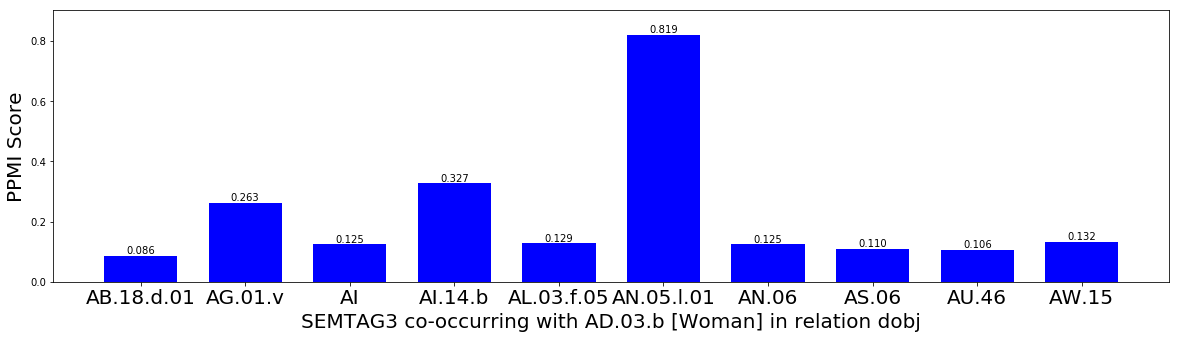

In [18]:
w=mnonl.get_top_features('AD.03.b',rel='dobj',displaygraph=True)

vard_lower
observed                                             [571493]
saw         [996, 4049, 4335, 5147, 7452, 9905, 12913, 173...
see                          [121649, 161332, 446113, 507893]
seeing                        [90361, 491634, 560775, 834295]
seen        [17019, 101432, 225159, 308704, 803689, 803808...
Name: fileid, dtype: object
(AI.14.b [Seeing/looking],0.8443905455724461) : [('saw', 138), ('seen', 10), ('seeing', 4), ('see', 4), ('observed', 1)]
vard_lower
meet                                             [717363]
met     [1099, 1348, 11379, 17629, 18562, 26879, 27176...
Name: fileid, dtype: object
(AN.05.l.01 [Meeting/encounter],0.48281896423249193) : [('met', 45), ('meet', 1)]
vard_lower
had                                      [336738, 488644]
has                                              [740988]
knew    [54516, 165314, 168039, 269684, 393780, 408836...
know    [58178, 207656, 375632, 408850, 415950, 541104...
Name: fileid, dtype: object
(AR.36 [Knowledge],0.0

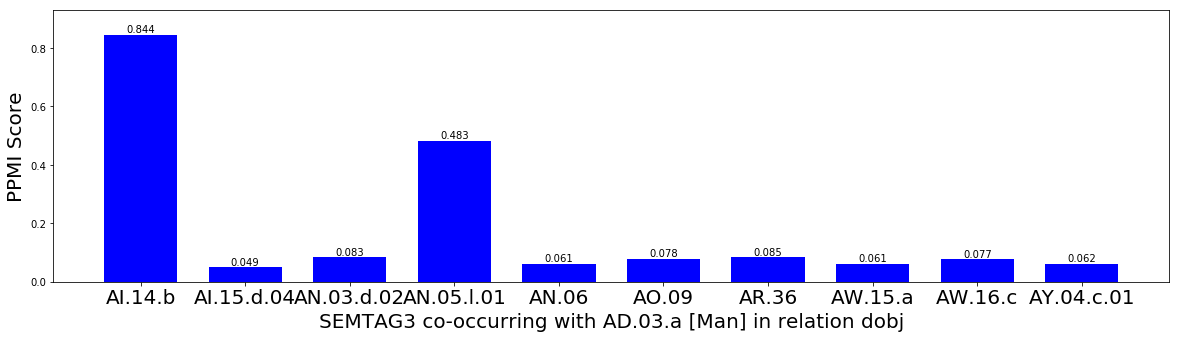

In [19]:
m=mnonl.get_top_features('AD.03.a',rel='dobj',displaygraph=True)

vard_lower
had     [438563, 457710, 505307, 568526, 667339, 85019...
has                                              [259510]
have                                      [76120, 763902]
Name: fileid, dtype: object
(AR.01 [Mental capacity],0.6778259690242985) : [('had', 7), ('have', 2), ('has', 1)]
vard_lower
warm    [19438]
Name: fileid, dtype: object
(AJ.09.a [Quality of colour],0.3090183229700636) : [('warm', 1)]
vard_lower
nursed    [785313]
Name: fileid, dtype: object
(BK.01.d.04.c [Billiards/pool/snooker],0.3090183229700636) : [('nursed', 1)]
vard_lower
nursed    [785831]
Name: fileid, dtype: object
(BE.01 [Upbringing],0.3090183229700636) : [('nursed', 1)]
vard_lower
teached    [634129]
Name: fileid, dtype: object
(BE.02 [Teaching],0.24122678002391187) : [('teached', 1)]
vard_lower
washing    [86760]
Name: fileid, dtype: object
(AI.16.a.01 [Washing],0.21203055164137866) : [('washing', 1)]
vard_lower
brought          [738726]
send       [3202, 257422]
sent             [502595]
Name:

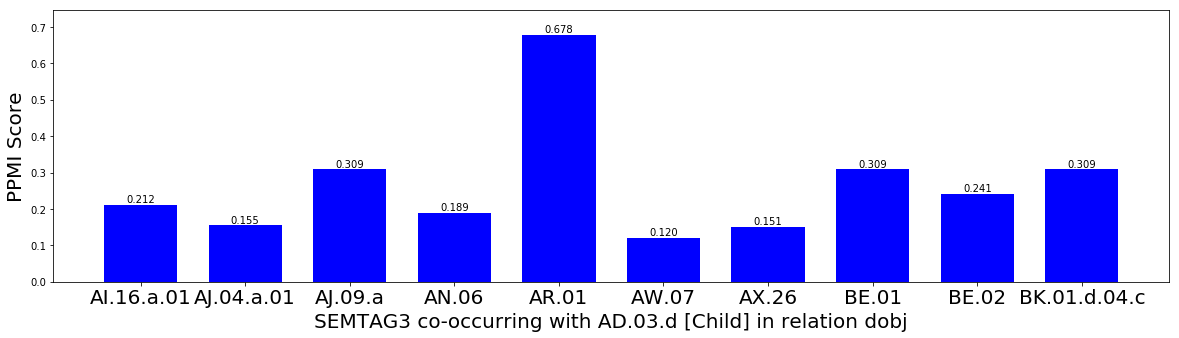

In [20]:
c=mnonl.get_top_features('AD.03.d',rel='dobj',displaygraph=True)

vard_lower
came    [5035, 48749, 179462, 375126, 424524, 424868, ...
Name: fileid, dtype: object
(AK.01 [Existence],0.6428908232938382) : [('came', 15)]
vard_lower
came        [9608, 255735, 314376, 371564, 505785, 564958,...
come                                          [32555, 419050]
got                                                  [356913]
received                                             [567958]
Name: fileid, dtype: object
(AW.06.b [Receiving],0.39570179773871583) : [('came', 9), ('come', 2), ('received', 1), ('got', 1)]
vard_lower
came    [10765, 116217, 219810, 235647, 250985, 463726...
Name: fileid, dtype: object
(AN.05.l [Movement towards a thing/person/position],0.3623086193405466) : [('came', 11)]
vard_lower
came    [23633, 272849, 288477, 368194, 804382]
come                                   [423480]
Name: fileid, dtype: object
(AK.04 [Present events],0.18595625294707085) : [('came', 5), ('come', 1)]
vard_lower
ran        [26725, 26798, 346032, 748054]
run         

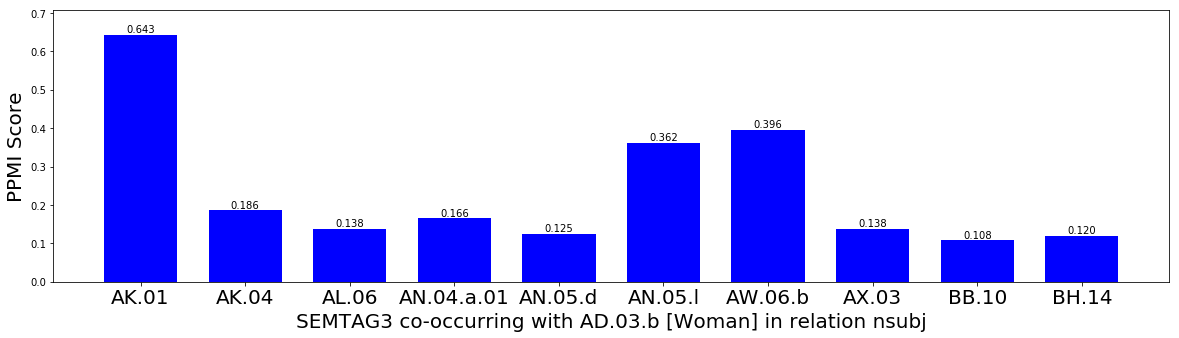

In [21]:
w=mnonl.get_top_features('AD.03.b',rel='nsubj',displaygraph=True)

vard_lower
came     [6811, 11157, 27804, 40144, 42260, 42288, 4391...
come                                      [519334, 532567]
exist                                              [86228]
Name: fileid, dtype: object
(AK.01 [Existence],0.5950974477144844) : [('came', 46), ('come', 2), ('exist', 1)]
vard_lower
accosted                                             [139869]
came        [7497, 10559, 21577, 45481, 47461, 48152, 6277...
come        [251410, 285851, 365052, 447396, 503750, 56108...
Name: fileid, dtype: object
(AN.05.l [Movement towards a thing/person/position],0.40454685118073885) : [('came', 33), ('come', 8), ('accosted', 1)]
vard_lower
gave        [7041, 12790, 19454, 31173, 35466, 50028, 5038...
give                                         [446333, 484970]
given                        [216191, 673590, 884718, 901635]
returned                             [692864, 803155, 948818]
Name: fileid, dtype: object
(AW.11 [Giving],0.2978399745128611) : [('gave', 46), ('given', 4), ('

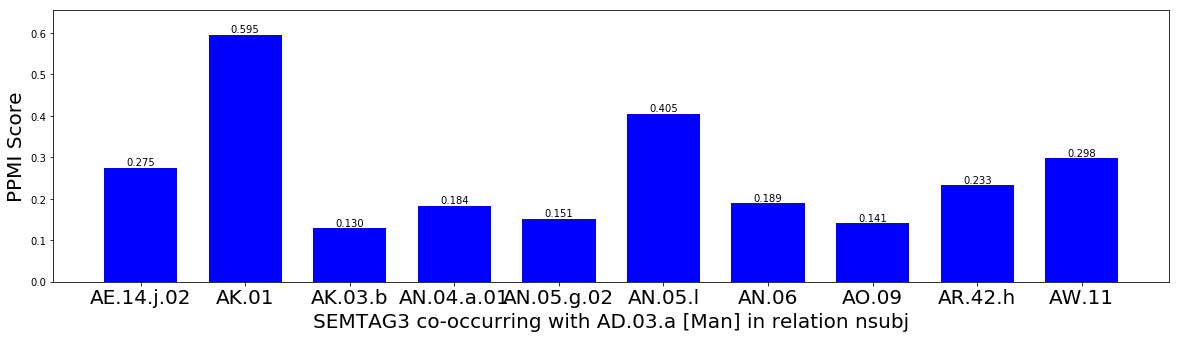

In [22]:
m=mnonl.get_top_features('AD.03.a',rel='nsubj',displaygraph=True)

vard_lower
unborn    [4411, 4725, 4937, 5144, 8774, 24721, 24732, 2...
Name: fileid, dtype: object
(AK.01 [Existence],0.95409124845893) : [('unborn', 13)]
vard_lower
alarmed                    [1010019]
crying     [464886, 570270, 1071587]
Name: fileid, dtype: object
(ZZ [Unrecognised],0.1908840760562933) : [('crying', 3), ('alarmed', 1)]
vard_lower
naked    [527884]
Name: fileid, dtype: object
(AH.02.c.01 [Nakedness/state of being unclothed],0.15217994695633166) : [('naked', 1)]
vard_lower
christened    [399588]
Name: fileid, dtype: object
(AX.21 [Naming],0.08381256030723544) : [('christened', 1)]
vard_lower
cried     [353125, 502625]
crying            [638905]
Name: fileid, dtype: object
(AX.12 [Requesting],0.06905222947835517) : [('cried', 2), ('crying', 1)]
vard_lower
ran    [405297]
Name: fileid, dtype: object
(AE.14.j.02 [Horse defined by purpose],0.05792874121461924) : [('ran', 1)]
vard_lower
picked    [1085010]
Name: fileid, dtype: object
(AG.02.c [Cultivation/tillage],0.049584

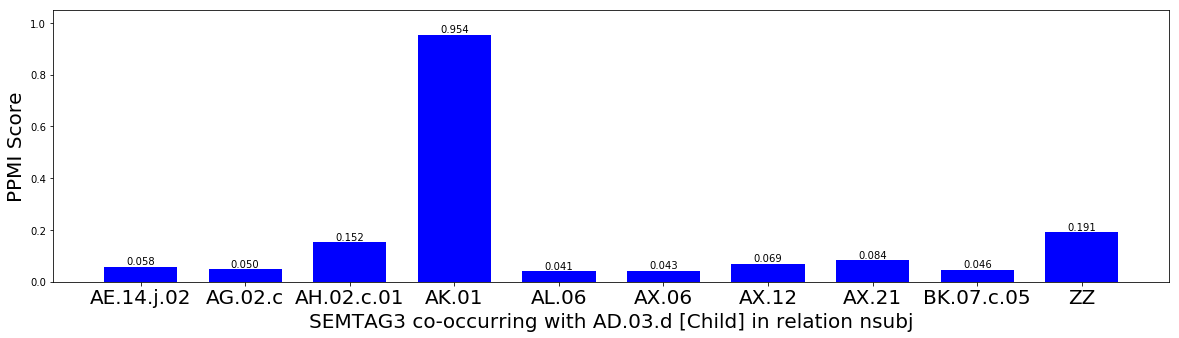

In [23]:
c=mnonl.get_top_features('AD.03.d',rel='nsubj',displaygraph=True)

vard_lower
distressed    [34362]
Name: fileid, dtype: object
(BC.09.e.01 [Legal seizure/recovery of property],0.6014147240705527) : [('distressed', 1)]
vard_lower
imposed    [7575]
Name: fileid, dtype: object
(BB.02.a [Command/bidding],0.34388154348981465) : [('imposed', 1)]
vard_lower
convicted    [385895]
Name: fileid, dtype: object
(BC.09.f.05 [Judging],0.3265429245859007) : [('convicted', 1)]
vard_lower
examined    [475780]
Name: fileid, dtype: object
(AC.02.c.01 [Examination],0.3074593188127572) : [('examined', 1)]
vard_lower
committed    [31078]
Name: fileid, dtype: object
(BC.09.e.02 [Arrest],0.30323199548151786) : [('committed', 1)]
vard_lower
brought    [450096]
Name: fileid, dtype: object
(AN.05.j [Going/coming in],0.2779638592653794) : [('brought', 1)]
vard_lower
left    [255915]
Name: fileid, dtype: object
(AN.05.m [Going away],0.21364451713764998) : [('left', 1)]
vard_lower
discharged    [273052]
Name: fileid, dtype: object
(BI.08 [Lack of work],0.2104742530350145) : [('di

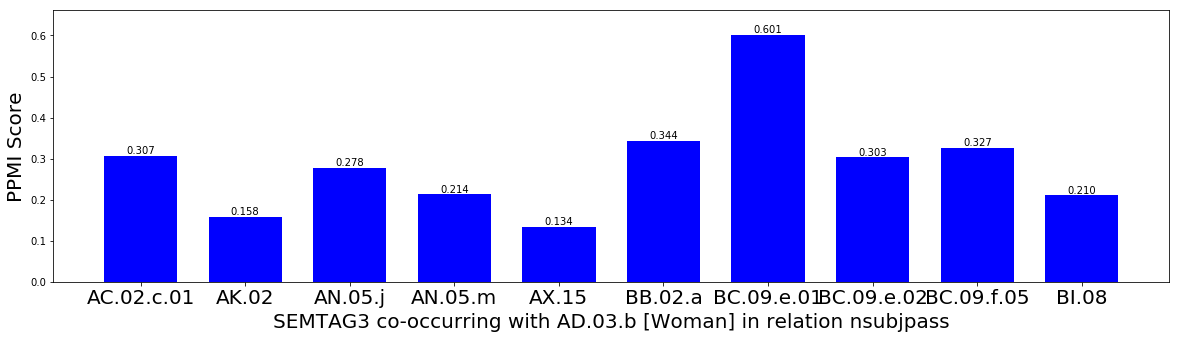

In [24]:
w=mnonl.get_top_features('AD.03.b',rel='nsubjpass',displaygraph=True)

vard_lower
taken    [49198, 55206, 127272, 166236, 168732, 276253,...
Name: fileid, dtype: object
(AW.15 [Taking],0.6526073363415216) : [('taken', 10)]
vard_lower
led        [270012]
managed    [417430]
Name: fileid, dtype: object
(BB.03 [Control],0.3502282910169718) : [('managed', 1), ('led', 1)]
vard_lower
expected    [15224]
Name: fileid, dtype: object
(AR.50 [Expectation],0.24779710111596517) : [('expected', 1)]
vard_lower
handcuffed    [101980]
Name: fileid, dtype: object
(BB.09.e.01.b [Binding/fettering],0.2143014938672501) : [('handcuffed', 1)]
vard_lower
escaped    [539163]
Name: fileid, dtype: object
(AO.16.c [Escape],0.2143014938672501) : [('escaped', 1)]
vard_lower
ran    [1010061]
Name: fileid, dtype: object
(AN.04.a.01 [Going swiftly on foot],0.2143014938672501) : [('ran', 1)]
vard_lower
stationed    [291044]
Name: fileid, dtype: object
(AL.04.a [Position/situation],0.18080588661853494) : [('stationed', 1)]
vard_lower
caught    [623290]
Name: fileid, dtype: object
(AC.01.a

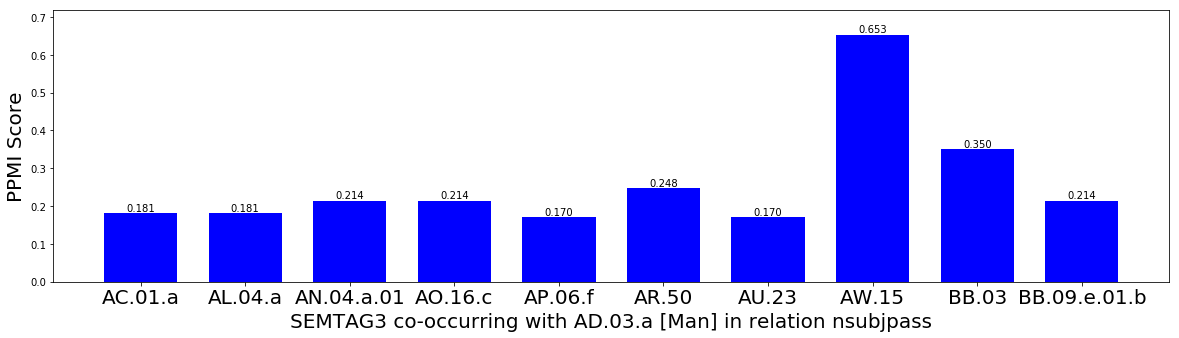

In [25]:
m=mnonl.get_top_features('AD.03.a',rel='nsubjpass',displaygraph=True)

vard_lower
examined    [28929]
Name: fileid, dtype: object
(AC.02.c.01 [Examination],0.7004917057259638) : [('examined', 1)]
vard_lower
dressed    [527812]
Name: fileid, dtype: object
(BJ.01.j [Selling],0.5301059831903824) : [('dressed', 1)]
vard_lower
searched    [221997]
Name: fileid, dtype: object
(AO.11.b [Searching/seeking],0.477806463743311) : [('searched', 1)]


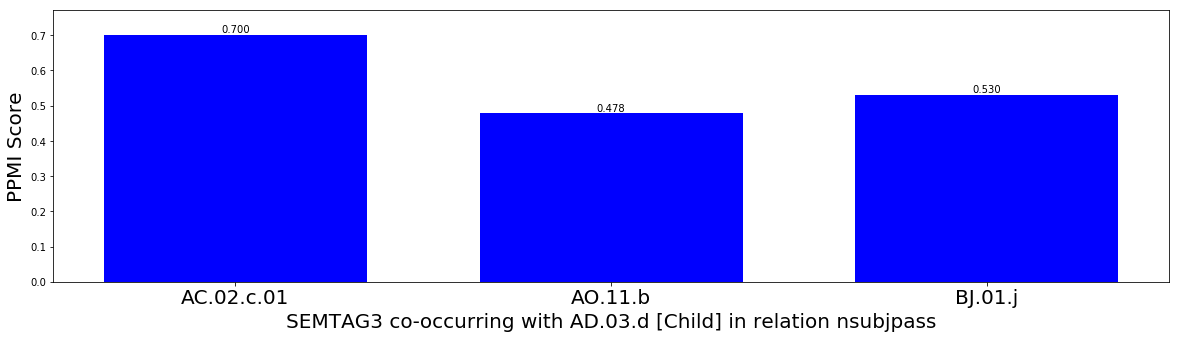

In [26]:
c=mnonl.get_top_features('AD.03.d',rel='nsubjpass',displaygraph=True)

vard_lower
another    [75416, 32375, 60225, 90576, 115705, 255733, 2...
Name: fileid, dtype: object
(ZZ [Unrecognised],0.9976968385830179) : [('another', 41)]
vard_lower
that    [11740, 48747, 54734, 77273, 3720, 239240, 309...
Name: fileid, dtype: object
(ZF [Pronoun],0.05035391075948647) : [('that', 14)]
vard_lower
said    [470639]
Name: fileid, dtype: object
(AX.03 [Speech],0.04462143405397368) : [('said', 1)]
vard_lower
which    [563926]
Name: fileid, dtype: object
(AP.01 [Relation/relationship],0.008627257712849432) : [('which', 1)]


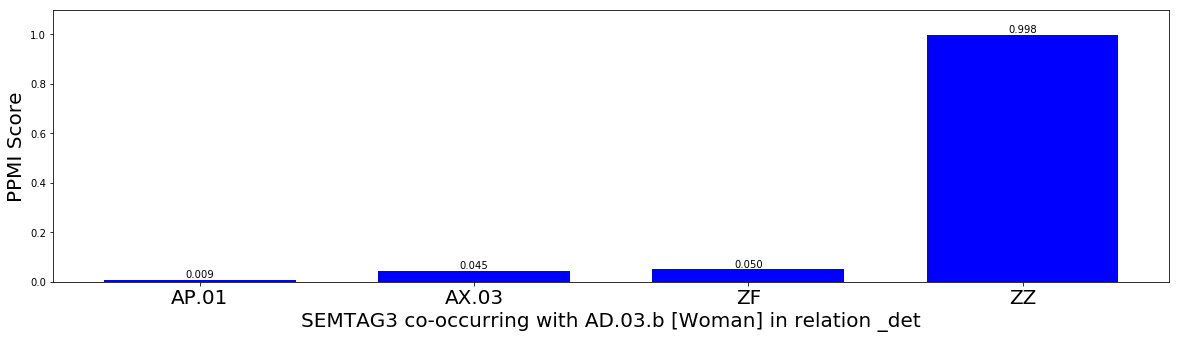

In [27]:
w=mnonl.get_top_features('AD.03.b',rel='_det',displaygraph=True)

vard_lower
another    [8874, 10608, 11714, 18491, 23987, 24131, 2422...
Name: fileid, dtype: object
(ZZ [Unrecognised],0.9985545449877657) : [('another', 195)]
vard_lower
that    [3909, 12914, 15609, 15646, 17372, 20793, 2157...
Name: fileid, dtype: object
(ZF [Pronoun],0.04643557151941285) : [('that', 62)]
vard_lower
a    [86225, 702227, 733059]
Name: fileid, dtype: object
(AD.03.a [Man],0.024503472695104042) : [('a', 3)]
vard_lower
m    [615863]
Name: fileid, dtype: object
(BG.07.d [Written character],0.008167824231701348) : [('m', 1)]
vard_lower
said    [119574]
Name: fileid, dtype: object
(AX.03 [Speech],0.0056213213977632515) : [('said', 1)]
vard_lower
each    [111582, 677490, 708725]
Name: fileid, dtype: object
(AP.02.b [Individual character/quality],0.004801929527758398) : [('each', 3)]
vard_lower
no    [101708, 630253, 1044930]
Name: fileid, dtype: object
(AK.01.a [Non-existence],0.003223021898177869) : [('no', 3)]
vard_lower
no    [22822]
Name: fileid, dtype: object
(AX.24 [De

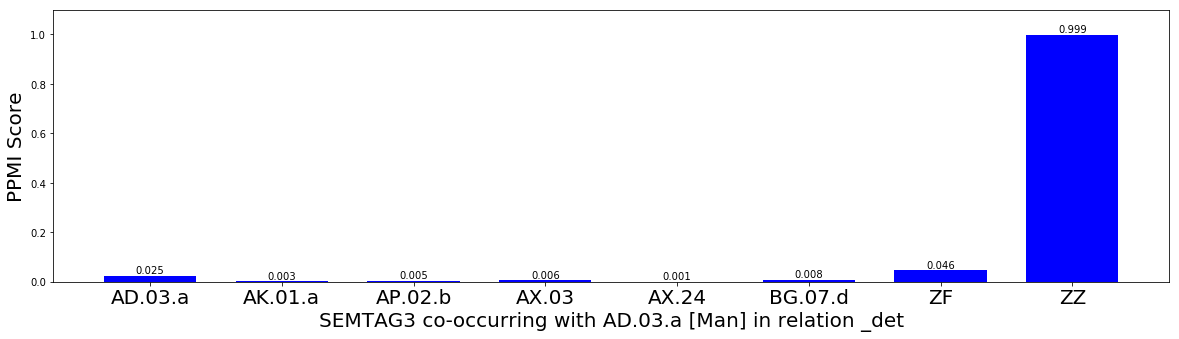

In [28]:
m=mnonl.get_top_features('AD.03.a',rel='_det',displaygraph=True)

vard_lower
a       [2172, 8772, 17761, 21742, 23740, 28921, 34156...
an                                               [441607]
the     [4409, 4723, 4935, 5142, 15415, 17318, 21894, ...
this                     [164977, 172281, 352607, 502650]
Name: fileid, dtype: object
(ZC [Grammatical Item],0.9894433364574526) : [('the', 76), ('a', 47), ('this', 4), ('an', 1)]
vard_lower
some    [201698, 386260, 509025]
Name: fileid, dtype: object
(AP.06 [Quantity],0.1449202675264716) : [('some', 3)]


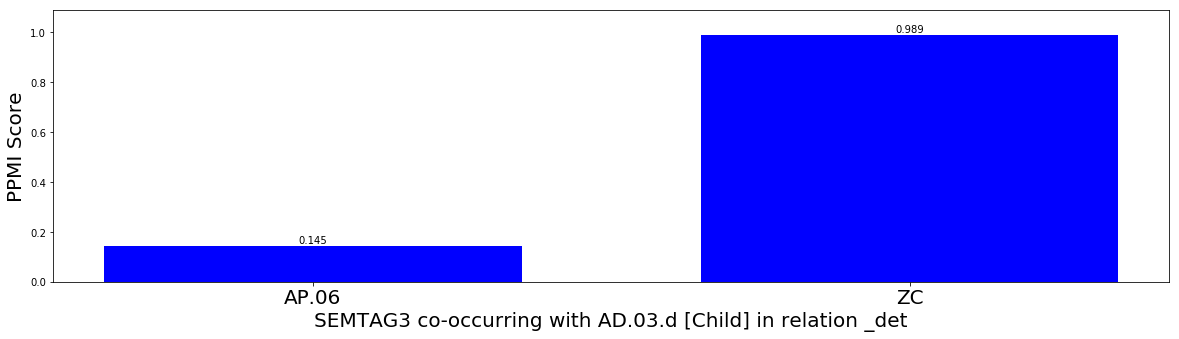

In [29]:
c=mnonl.get_top_features('AD.03.d',rel='_det',displaygraph=True)

# Similar Concepts
We can find the similarity between 2 concepts in the given corpus

First, the similarities between WOMAN-MAN, WOMAN-CHILD and MAN-CHILD over the whole LPMI matrix (all grammatical relations)

We can also look at a particular relation.  We can see that MAN and WOMAN are similar in terms of their adjectival modifies and the verbs which are done to them, but disimilar in terms of the verbs they do.  On the other hand, WOMAN and CHILD and MAN and CHILD seem consistently dissimilar in all these relations.


In [30]:
rels=[None,'_amod','dobj','nsubj','_det','nsubjpass']
for rel in rels:
    print(rel)
    print("WOMAN-MAN: {}".format(mnonl.find_similarity('AD.03.a','AD.03.b',rel)))
    print("MAN-CHILD: {}".format(mnonl.find_similarity('AD.03.a','AD.03.d',rel)))
    print("WOMAN-CHILD: {}".format(mnonl.find_similarity('AD.03.b','AD.03.d',rel)))
    print("-----")

None
WOMAN-MAN: 0.9728788652496243
MAN-CHILD: 0.5205110596689031
WOMAN-CHILD: 0.5267768691515803
-----
_amod
WOMAN-MAN: 0.9572309329278561
MAN-CHILD: 0.0546002247558351
WOMAN-CHILD: 0.055697409301285764
-----
dobj
WOMAN-MAN: 0.6921775490345037
MAN-CHILD: 0.016020086150965493
WOMAN-CHILD: 0.03116051249414836
-----
nsubj
WOMAN-MAN: 0.6955542760547022
MAN-CHILD: 0.6137434726837381
WOMAN-CHILD: 0.6477618634860821
-----
_det
WOMAN-MAN: 0.9988437567333986
MAN-CHILD: 0.0
WOMAN-CHILD: 0.0
-----
nsubjpass
WOMAN-MAN: 0.07125759776689064
MAN-CHILD: 0.03542888834161152
WOMAN-CHILD: 0.21537270267649117
-----


# Finding Nearest Neighbours


In [31]:
concepts=['AD.03.b','AD.03.a','AD.03.d']
for concept in concepts:
    for rel in rels:
        print('{} neighbours for {}'.format(concept,rel))
        print(mnonl.find_knn(concept,rel))
        print("-----")

AD.03.b neighbours for None
[('AD.03.b [Woman]', 1.0000000000000004), ('AD.03.a [Man]', 0.9728788652496243), ('BB.12.e.02 [Prisoner]', 0.9261394294857804), ('BB.09.e.01.a [Confinement]', 0.9244608893292509), ('BI.11.x.01 [Bag]', 0.9080265587075815), ('BC.09.e.03 [Accusation/allegation/indictment]', 0.9010032358826738), ('AD.03.d.01 [Boy]', 0.9009924193283305), ('AY.06.a.03.a [Title/form of address for persons of rank]', 0.8981343889699909), ('BC.07.b [Law-enforcement/peace-officer]', 0.8964143243781715), ('AB.17.f [Bodily substance, tissue]', 0.895703293186243)]
-----
AD.03.b neighbours for _amod
[('AD.03.b [Woman]', 0.9999999999999999), ('AD.03.a [Man]', 0.9572309329278561), ('AD.03.c.02 [Young woman]', 0.8819557730260679), ('BI.12.a.07.a [Skin with hair attached/fur]', 0.8819557730260679), ('AD.03.c.01 [Youth/young man]', 0.8267577472379222), ('BD.05.g.02 [Unchastity]', 0.8130147561320559), ('BE.04 [Member of university]', 0.6951622874109246), ('AU.27.c [Terms of endearment]', 0.6161

[('AD.03.d [Child]', 0.9999999999999999), ('AG.01.d.02 [Part/joint of animal]', 0.9998362130159347), ('BK.01.d.04.e [Card-game]', 0.9995341739075564), ('BK.05.d.05 [Drawing]', 0.9993936942421354), ('BI.11.b [Shaping tools/equipme]', 0.9967444215940044), ('AI.16.a.01.b [Washing clothes and textile articles]', 0.9967444215940044), ('BI.09.c.06 [Woodworker]', 0.9964700221969041), ('BI.11.k [Ladder]', 0.9950647430723482), ('AE.13.o [Order Passeriformes (song-birds)]', 0.9939283270632321), ('BK.01.e.03 [Top]', 0.9925206644156186)]
-----
AD.03.d neighbours for nsubjpass
[('AD.03.d [Child]', 1.0), ('AB.10 [Physical Aspects of Organisms]', 0.5301059831903824), ('AH.01.h.03.c [Made from silk]', 0.5301059831903824), ('BG.07.h [Writing materials]', 0.4835815097317604), ('BA.15.a.02.a [Spear/lance]', 0.477806463743311), ('AM.08.b [The present (time)]', 0.477806463743311), ('AO.09 [Ceasing]', 0.4771016484446194), ('AZ.06.e.01 [Accommodation/lodging]', 0.4544479850936115), ('AG.01.d [Animals for foo

## Comparing Corpora
We need a Samuels Comparator which takes a dictionary of filenames (as set up above) and allows us to compare one against the rest

In [32]:
test={'fnonl':'f_nonl','mnonl':'m_nonl'}

my_comp=Sam.Comparator(filenames)

Now we can compute the characteristic terms of one corpus compared to the others.  The key for the corpus which is to be compared against the others needs to be given.  

measure: default = 'llr'; others include 'pmi', 'kl' and 'jsd'

field: default = 'SEMTAG3'; any other field in the dataframe can be given e.g., 'SEMTAG1' or 'vard' but not extensively tested

cutoff: all distinctive tags will be returned for LLR, but this is used to cutoff the number for other measures and also in the list that is displayed automatically and is used in the graph

displaygraph: True to display a barchart of the terms 

Size of corpus is 219407
Size of corpus is 1302410
118 significantly characterising terms
Number of characteristic tags is 118
(AY.01.g.02 [Married man], 1331.5348625452032) : [('husband', 518), ('husbands', 5)]
(AZ.06.f.02.f [Room], 298.0152017216491) : [('room', 616), ('cellar', 23), ('garret', 10), ('rooms', 7), ('bedroom', 6), ('scullery', 4), ('closet', 4), ('back-parlour', 4), ('sitting-room', 3), ('loft', 3)]
(BF.25.j [Vestments], 269.97472034528187) : [('gown', 165), ('apron', 98), ('gowns', 57), ('aprons', 11), ('shovels', 3), ('shovel', 1)]
(AK.01 [Existence], 239.48993713865343) : [('things', 513), ('thing', 176), ('came', 176), ('in', 140), ('up', 56), ('come', 20), ('unborn', 2), ('ware', 1), ('is', 1), ('existence', 1)]
(AY.01.g.01 [Married woman], 230.99585901972938) : [('wife', 333), ('woman', 3), ("ma'am", 3)]
(AZ.06.f.02.h [Stairs], 226.160270676862) : [('stairs', 375), ('landing', 3), ('staircase', 2), ('stair-foot', 1), ('stair', 1), ('landing-place', 1)]
(AY.01.e.0

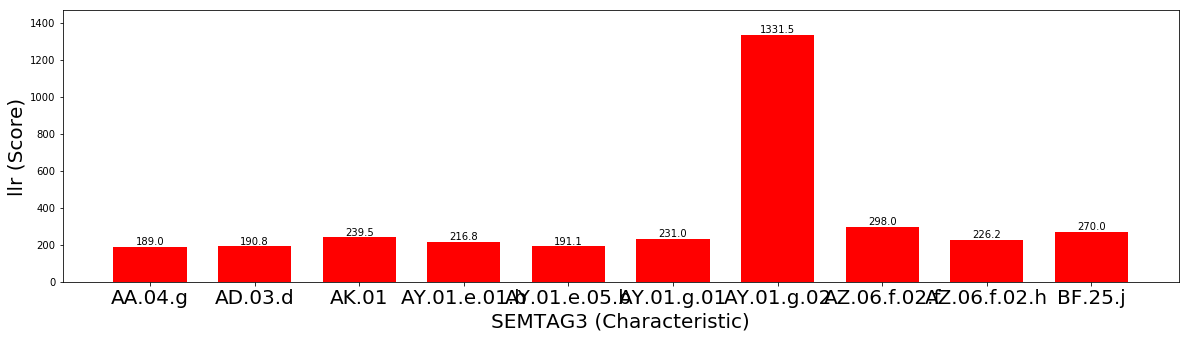

In [33]:
fdef_tags=my_comp.compute_surprises('fnonl',measure='llr',field='SEMTAG3',cutoff=10,displaygraph=True)

Size of corpus is 1083003
Size of corpus is 1302410
149 significantly characterising terms
Number of characteristic tags is 149
(BC.07.b [Law-enforcement/peace-officer], 121.22645044794501) : [('constable', 1131), ('watch-house', 312), ('watchman', 285), ('watchmen', 25), ('constables', 11), ('officer', 6)]
(BB.03 [Control], 106.7051027720248) : [('of', 110), ('charge', 109), ('took', 73), ('led', 47), ('take', 35), ('leads', 25), ('leading', 19), ('lead', 16), ('hold', 11), ('direction', 8)]
(BB.12.d.01 [Instrument/place of torture], 97.49795967762898) : [('horse', 409), ('horses', 131), ('boots', 5), ('wheels', 1), ('wheel', 1), ('picket', 1), ('gridiron', 1)]
(BA.14.k.08.a [Officer/soldier of rank], 95.35990438429283) : [('officer', 1501), ('officers', 111), ('commanding', 1)]
(AK.02 [Creation], 89.96684826455936) : [('produce', 414), ('produced', 369), ('made', 339), ('produces', 244), ('make', 114), ('producing', 62), ('making', 33), ('up', 20), ('brought', 19), ('makes', 7)]
(AO.

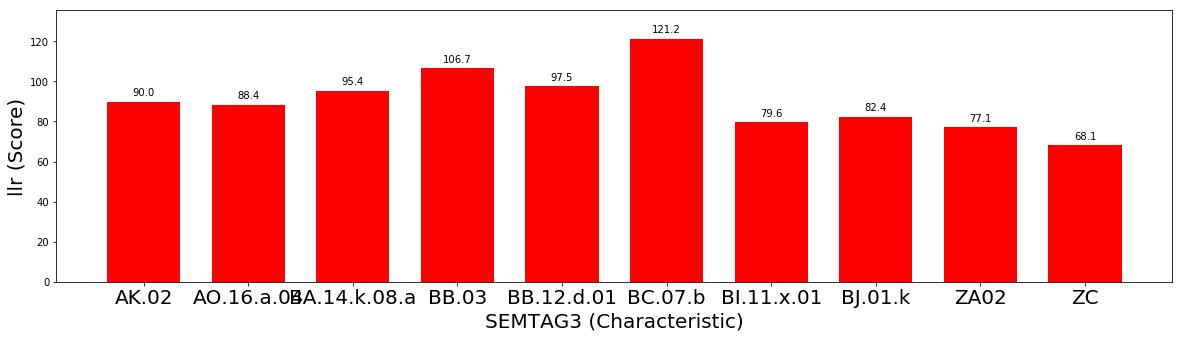

In [34]:
mwv_tags=my_comp.compute_surprises('mnonl',field='SEMTAG3',measure='llr',cutoff=10,displaygraph=True)